## Example 9.
### Sensitivity of hydraulic head at a point and at a discrete time to <font color='blue'>spatially uniform initial conditions</font> under transient flow conditions

## 0. Forward model
<br>
Governing equation:

$\begin{align}
\quad\quad K\ b\ \frac{\partial^2h}{\partial x^2}+R=S_s\ b\ \frac{\partial h}{\partial t}\cr
\cr\end{align}$

Boundary conditions:

$\begin{align}
\quad\quad -K\ b\ \frac{dh(x)}{dx}=0\ ,\quad\quad\quad\;\;\, x=0=\Gamma_2\cr
\end{align}$

$\begin{align}
\quad\quad h(x,t)=h_{\Gamma_{1_L}}\ ,\quad\quad\quad\quad\quad x=L=\Gamma_{1_L}\cr
\cr\end{align}$

Initial conditions:

$\begin{align}
\quad\quad h(x,t)=h_0\ ,\quad\quad\quad\quad\quad\quad t=0\cr
\cr\end{align}$

Closed-form solution:

$\begin{align}
\quad\quad \rm{Not\ available}
\cr\cr\end{align}$

Spatial derivatives from differentiation:

$\begin{align}
\quad\quad \rm{Not\ available}
\cr\cr\end{align}$

In [133]:
from IPython.display import HTML, display
def set_background(color):
    script = (
        "var cell = this.closest('.code_cell');"
        "var editor = cell.querySelector('.input_area');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)").format(color)
    display(HTML('<img src onerror="{}">'.format(script)))

In [134]:
from warnings import filterwarnings
filterwarnings("ignore", category=DeprecationWarning)

import numpy as np

K, Ss, R, b, L, BC1h, ICh, ocol, nper = 10., 1e-2, 1e-1/1000., 10., 10000., 0., 50., 5000, 1000
X = np.arange(L)

## 1. Direct sensitivity

$\begin{align}
\quad\quad\rm{Not\ available}
\cr\end{align}$

## 2. Perturbation sensitivity
$\begin{align}\cr
\frac{\partial h(x')}{\partial h_0}\approx\frac{h(x,h_0+\Delta h_0)-h(x,h_0)}{\Delta h_0}\;
\cr\cr\end{align}$

### 2a. Analytical

$\begin{align}
\quad\quad\rm{Not\ available}
\cr\end{align}$

### 2b. Semi-analytical

$\begin{align}
\quad\quad\rm{Not\ available}
\cr\end{align}$

### 2c. Numerical

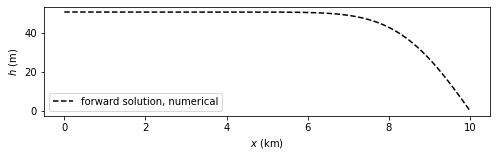

In [135]:
import flopy

dpar = 1e-2
nrow, ncol = 1, int(L)
M0 = flopy.modflow.Modflow(modelname='model', exe_name='../mf2005.exe')
flopy.modflow.ModflowDis(M0, nlay=1, nrow=nrow, ncol=ncol, nper=nper, delr=1., delc=1., top=0., botm=-b,
                         steady=False, perlen=np.ones(nper), nstp=1)
flopy.modflow.ModflowBas(M0, ibound=np.hstack([np.ones([nrow, ncol-1], dtype=int), -1*np.ones([1,1])]), 
                         strt=np.hstack([ICh*np.ones([nrow, ncol-1], dtype=float), np.atleast_2d([0.])]))
flopy.modflow.ModflowLpf(M0, hk=K, vka=-999., ss=Ss, sy=-999., ipakcb=53)
flopy.modflow.ModflowRch(M0, nrchop=1, rech={0:R}, ipakcb=53)
flopy.modflow.ModflowPcg(M0, hclose=1e-6, rclose=1e-6)
flopy.modflow.ModflowOc(M0, stress_period_data={(i,0): ['save head'] for i in range(nper)})
M0.write_input()
success, buff = M0.run_model(silent=True)
H0 = flopy.utils.binaryfile.HeadFile('model.hds').get_data(kstpkper=[0,nper-1])[0,0,:]

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.subplots(figsize=[8,2])
plt.plot(X/1000., H0, 'k--', mfc='none', label='forward solution, numerical')
plt.xlabel('$x$ (km)')
plt.ylabel('$h$ (m)')
plt.legend(loc=3);

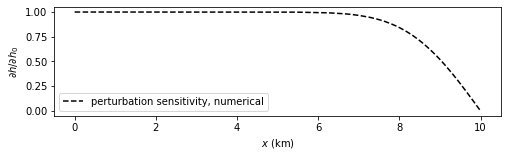

In [136]:
M1 = M0
flopy.modflow.ModflowBas(M1, ibound=np.hstack([np.ones([nrow, ncol-1], dtype=int), -1*np.ones([1,1])]), 
                         strt=np.hstack([(ICh+ICh*dpar)*np.ones([nrow, ncol-1], dtype=float), 
                                          np.atleast_2d([0.])]))
M1.write_input()
success, buff = M1.run_model(silent=True)
H1 = flopy.utils.binaryfile.HeadFile('model.hds').get_data(kstpkper=[0,nper-1])[0,0,:]
dhdICh_p = (H1-H0)/(ICh*dpar)
benchmark = dhdICh_p[ocol]

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
f,s = plt.subplots(figsize=[8,2])
plt.plot(X/1000., dhdICh_p, 'k--', mfc='none', label='perturbation sensitivity, numerical')
plt.xlabel('$x$ (km)')
plt.ylabel(r'$\partial h / \partial h_0$')
plt.legend(loc=3);

In [137]:
set_background('rgba(0, 200, 0, 0.2)')
print('%.6f'% dhdICh_p[ocol])

0.999619


## 3. Adjoint sensitivity

<br>
    
$\begin{align}
\quad\quad \frac{\partial h(x')}{\partial h_0}=\int\limits_X\psi^*_1(x,0)\ S_s\;b \; dx
\cr\end{align}$

Governing equation:

$\begin{align}
\quad\quad K\ b\ \frac{\partial^2\psi^*_1}{\partial x^2}+\delta(x-x') \ \delta(t-t')=-S_s\ b\ \frac{\partial \psi^*_1}{\partial t}\cr
\cr\end{align}$

Boundary conditions:

$\begin{align}
\quad\quad -K\ b\ \frac{d\psi^*_1}{dx}=0\ ,\quad\quad\quad\;\;\, x=0=\Gamma_2\cr
\end{align}$

$\begin{align}
\quad\quad \psi^*_1(x,t)=0\ ,\quad\quad\quad\quad\quad x=L=\Gamma_{1_L}\cr
\cr\end{align}$

Terminal conditions:

$\begin{align}
\quad\quad \psi^*_1(x,t)=0\ ,\quad\quad\quad\quad\quad t=t_{final}\cr
\cr\end{align}$

Closed-form solution:

$\begin{align}
\quad\quad\rm{Not\ available}
\cr\end{align}$

### 3a. Analytical

$\begin{align}
\quad\quad\rm{Not\ available}
\cr\end{align}$

### 3b. Semi-analytical

$\begin{align}
\quad\quad\rm{Not\ available}
\cr\end{align}$

### 3c. Numerical

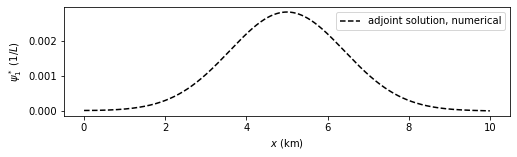

In [138]:
M0 = flopy.modflow.Modflow(modelname='model', exe_name='../mf2005.exe')
flopy.modflow.ModflowDis(M0, nlay=1, nrow=1, ncol=ncol, nper=nper, delr=1., delc=1., top=0., botm=-b, 
                         steady=False, perlen=np.ones(nper), nstp=1)
strt = np.zeros([nrow, ncol], dtype=float)
strt[0,ocol] = 1./Ss/b
flopy.modflow.ModflowBas(M0, ibound=np.hstack([np.ones([nrow, ncol-1], dtype=int), -1*np.ones([1,1])]), 
                         strt=strt)
flopy.modflow.ModflowLpf(M0, hk=K, vka=-999., ss=Ss, sy=-999., ipakcb=53)
flopy.modflow.ModflowPcg(M0, hclose=1e-6, rclose=1e-6)
flopy.modflow.ModflowOc(M0, stress_period_data={(i,0): ['save head'] for i in range(nper)})
M0.write_input()
success, buff = M0.run_model(silent=True)
A = np.ravel(flopy.utils.binaryfile.HeadFile('model.hds').get_data(kstpkper=[0,nper-1])[0,0,:])

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
f,s = plt.subplots(figsize=[8,2])
plt.plot(X/1000., A, 'k--', mfc='none', label='adjoint solution, numerical')
plt.xlabel('$x$ (km)')
plt.ylabel(r'$\psi^*_1$ (1/$L$)')
plt.legend();

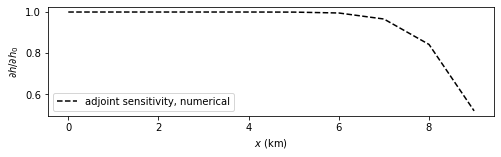

In [139]:
dhdICh = np.empty(0)
for oc in [int(x) for x in X[::1000]]:
    M1 = M0
    strt = np.zeros([nrow, ncol], dtype=float)
    strt[0,oc] = 1./Ss/b
    flopy.modflow.ModflowBas(M1, ibound=np.hstack([np.ones([nrow, ncol-1], dtype=int), -1*np.ones([1,1])]), 
                             strt=strt)  
    M1.write_input()
    success, buff = M1.run_model(silent=True)
    A = flopy.utils.binaryfile.HeadFile('model.hds').get_data(kstpkper=[0,nper-1])[0,0,:]
    dhdICh = np.append(dhdICh, np.sum(A*Ss*b))

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
f,s = plt.subplots(figsize=[8,2])
plt.plot(X[::1000]/1000., dhdICh, 'k--', mfc='none', label='adjoint sensitivity, numerical')
plt.xlabel('$x$ (km)')
plt.ylabel(r'$\partial h / \partial h_0$')
plt.legend(loc=3);

In [140]:
set_background('rgba(0, 200, 0, 0.2)')
print('%.6f (%.6f)'% (dhdICh_a[int(np.where(X[::1000]==float(ocol))[0])], benchmark))

0.999999 (0.999619)
